In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re

In [3]:
df = pd.read_csv('kaggle_fake_train.csv')

In [4]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [5]:
df.drop('id', axis=1, inplace=True)

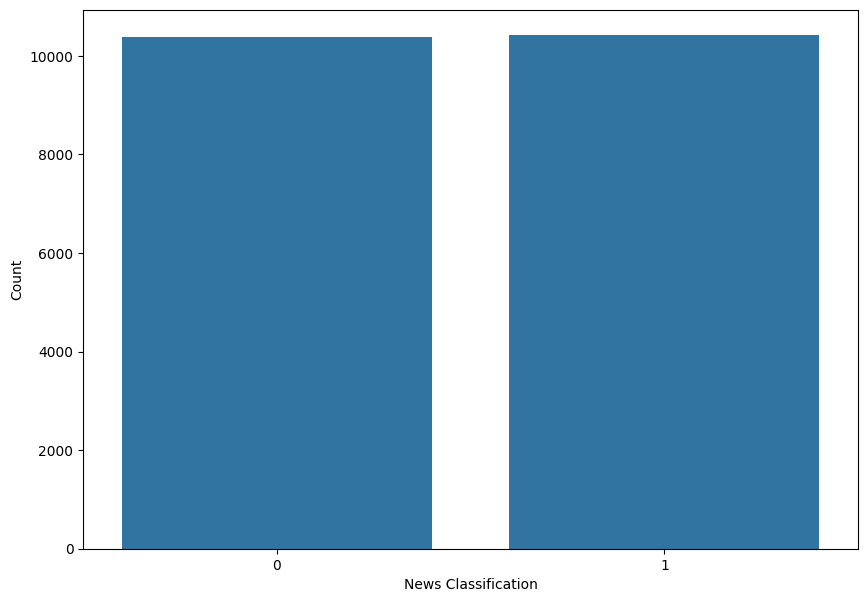

In [8]:
plt.figure(figsize=(10,7))
sns.countplot(x='label', data=df)
plt.xlabel('News Classification')
plt.ylabel('Count')
plt.show()

In [10]:
df.isnull().sum()

title      558
author    1957
text        39
label        0
dtype: int64

In [11]:
df.dropna(inplace=True)

In [13]:
news = df.copy()

In [14]:
news.reset_index(inplace=True)

In [16]:
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
corpus = []
ps = PorterStemmer()
for i in range(0,news.shape[0]):
  title = re.sub(pattern='[^a-zA-Z]', repl=' ', string=news.title[i])
  title = title.lower()
  words = title.split()
  words = [word for word in words if word not in set(stopwords.words('english'))]
  words = [ps.stem(word) for word in words]
  title = ' '.join(words)
  corpus.append(title)

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
counter_vectorizer = CountVectorizer(max_features=5000, ngram_range=(1,3))

In [21]:
X = counter_vectorizer.fit_transform(corpus).toarray()

In [23]:
Y =news['label']

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

In [25]:
from sklearn.naive_bayes import MultinomialNB

naive_model = MultinomialNB()

In [26]:
naive_model.fit(X_train, Y_train)

MultinomialNB()

In [27]:
predictions = naive_model.predict(X_test)

In [28]:
from sklearn.metrics import classification_report

print( classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91      2026
           1       0.89      0.90      0.89      1631

    accuracy                           0.90      3657
   macro avg       0.90      0.90      0.90      3657
weighted avg       0.91      0.90      0.90      3657



In [31]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()


In [32]:
logistic_regression.fit(X_train, Y_train)


LogisticRegression()

In [33]:
predictions = logistic_regression.predict(X_test)

In [34]:
from sklearn.metrics import classification_report

print( classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94      2026
           1       0.90      0.96      0.93      1631

    accuracy                           0.94      3657
   macro avg       0.93      0.94      0.94      3657
weighted avg       0.94      0.94      0.94      3657



In [35]:
classifier = LogisticRegression(C=0.8, random_state=0)
classifier.fit(X_train, Y_train)


LogisticRegression(C=0.8, random_state=0)

In [36]:
def fake_news(sample_news):
  sample_news = re.sub(pattern='[^a-zA-Z]',repl=' ', string=sample_news)
  sample_news = sample_news.lower()
  sample_news_words = sample_news.split()
  sample_news_words = [word for word in sample_news_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_news = [ps.stem(word) for word in sample_news_words]
  final_news = ' '.join(final_news)

  temp = counter_vectorizer.transform([final_news]).toarray()
  return classifier.predict(temp)

In [37]:
df_test = pd.read_csv('kaggle_fake_test.csv')

In [38]:
news_title = df_test['title']

In [51]:
from random import randint

row = randint(0,news_title.shape[0]-1)
sample_news = news_title[row]

print('News: {}'.format(sample_news))
if fake_news(sample_news):
  print('Prediction: This is a FAKE news!')
else:
  print('Prediction: This is a REAL news.')

News: University Of Iowa Triggered By Flyers Opposing Anti-White Propaganda
Prediction: This is a FAKE news!
